## Importing Data

In [1]:
import pandas as pd

In [2]:
air = pd.read_csv('airquality.csv')

In [3]:
air.shape

(153, 7)

## Drop unnamed coloumn

In [11]:
air.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [13]:
air.count()

Ozone      116
Solar.R    146
Wind       153
Temp       153
Month      153
Day        153
dtype: int64

In [14]:
air.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [7]:
air.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [15]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


## Handling Null Data

In [16]:
A = air.dropna()

In [17]:
A.shape

(111, 6)

In [18]:
A.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [11]:
A = air.fillna(0)

In [12]:
A.shape

(153, 7)

In [13]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,0.0,0.0,14.3,56,5,5


In [14]:
A = air.fillna(method='pad')

In [15]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,18.0,313.0,14.3,56,5,5


In [16]:
A = air.fillna(method='backfill')

In [17]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,28.0,299.0,14.3,56,5,5


## Replace null values using numpy

In [18]:
import numpy as np

In [19]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].mean())

In [20]:
A.head()

0    41.00000
1    36.00000
2    12.00000
3    18.00000
4    42.12931
Name: Ozone, dtype: float64

In [21]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].mean())

In [22]:
A.head()

0    41.00000
1    36.00000
2    12.00000
3    18.00000
4    42.12931
Name: Ozone, dtype: float64

In [23]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].median())

In [24]:
A.head()

0    41.0
1    36.0
2    12.0
3    18.0
4    31.5
Name: Ozone, dtype: float64

In [25]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].mode())

In [26]:
A.head()

0    41.0
1    36.0
2    12.0
3    18.0
4     NaN
Name: Ozone, dtype: float64

## Impute the missing values

In [27]:
from sklearn.impute import SimpleImputer 

In [32]:
imp = SimpleImputer(missing_values=np.nan,strategy='mean')

In [33]:
A = imp.fit_transform(air)

In [34]:
A

array([[  1.,  41., 190., ...,  67.,   5.,   1.],
       [  2.,  36., 118., ...,  72.,   5.,   2.],
       [  3.,  12., 149., ...,  74.,   5.,   3.],
       ...,
       [151.,  14., 191., ...,  75.,   9.,  28.],
       [152.,  18., 131., ...,  76.,   9.,  29.],
       [153.,  20., 223., ...,  68.,   9.,  30.]])

In [35]:
A = pd.DataFrame(A, columns=air.columns)

In [36]:
A.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1.0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,2.0,36.00000,118.000000,8.0,72.0,5.0,2.0
2,3.0,12.00000,149.000000,12.6,74.0,5.0,3.0
3,4.0,18.00000,313.000000,11.5,62.0,5.0,4.0
4,5.0,42.12931,185.931507,14.3,56.0,5.0,5.0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
len(A)

153

In [39]:
train, test = train_test_split(A)

In [40]:
len(train)

114

In [41]:
len(test)

39

In [42]:
train.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
1,2.0,36.0,118.0,8.0,72.0,5.0,2.0
94,95.0,16.0,77.0,7.4,82.0,8.0,3.0
12,13.0,11.0,290.0,9.2,66.0,5.0,13.0
63,64.0,32.0,236.0,9.2,81.0,7.0,3.0
11,12.0,16.0,256.0,9.7,69.0,5.0,12.0


In [43]:
train, test = train_test_split(A, test_size = 0.20)

In [44]:
len(test)

31

In [45]:
len(train)

122

In [46]:
A.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
B = scaler.fit_transform(A)

In [50]:
pd.DataFrame(B).describe()

,0,1,2,3,4,5,6
count,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,153.000000,1.530000e+02
mean,9.288140e-17,-2.322035e-17,-1.741526e-17,-2.322035e-17,7.430512e-16,0.000000,-6.966105e-17
std,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284,1.003284e+00
min,-1.720767e+00,-1.438115e+00,-2.040912e+00,-2.351584e+00,-2.319450e+00,-1.411916,-1.675504e+00
25%,-8.603835e-01,-7.388013e-01,-7.520217e-01,-7.283322e-01,-6.235080e-01,-0.703643,-8.832458e-01
50%,0.000000e+00,0.000000e+00,9.203008e-02,-7.333578e-02,1.184665e-01,0.004629,2.219211e-02
75%,8.603835e-01,1.353414e-01,7.992086e-01,4.392701e-01,7.544446e-01,0.712902,8.144503e-01
max,1.720767e+00,4.401158e+00,1.688885e+00,3.059256e+00,2.026401e+00,1.421174,1.719888e+00


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
B = scaler.fit_transform(A)

In [54]:
pd.DataFrame(B).describe()

,0,1,2,3,4,5,6
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.500000,0.246283,0.547191,0.434606,0.533716,0.498366,0.493464
std,0.291522,0.171817,0.268992,0.185421,0.230860,0.354131,0.295484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.119760,0.345566,0.300000,0.390244,0.250000,0.233333
50%,0.500000,0.246283,0.571865,0.421053,0.560976,0.500000,0.500000
75%,0.750000,0.269461,0.761468,0.515789,0.707317,0.750000,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
B = pd.DataFrame(B).describe()

In [56]:
from sklearn.preprocessing import Binarizer

In [57]:
bin = Binarizer(threshold=0.5)

In [58]:
B = bin.fit_transform(B)

In [59]:
pd.DataFrame(B)

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [60]:
data=pd.read_csv('student.csv')

## Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
B = le.fit_transform(data['name'])

In [64]:
B

array([6, 2, 5, 0, 8, 9, 1, 3, 4, 7])

In [65]:
B = data[:]

In [66]:
B['name'] = le.fit_transform(B['name'])

In [67]:
B

,roll,name,class,marks,age
0,1,6,TE,56.77,22
1,2,2,TE,59.77,21
2,3,5,BE,76.88,19
3,4,0,TE,69.66,20
4,5,8,TE,63.28,20
5,6,9,BE,49.55,20
6,7,1,BE,65.34,19
7,8,3,BE,68.33,23
8,9,4,TE,56.75,20
9,10,7,BE,78.66,21


In [68]:
A

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1.0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,2.0,36.00000,118.000000,8.0,72.0,5.0,2.0
2,3.0,12.00000,149.000000,12.6,74.0,5.0,3.0
3,4.0,18.00000,313.000000,11.5,62.0,5.0,4.0
4,5.0,42.12931,185.931507,14.3,56.0,5.0,5.0
5,6.0,28.00000,185.931507,14.9,66.0,5.0,6.0
6,7.0,23.00000,299.000000,8.6,65.0,5.0,7.0
7,8.0,19.00000,99.000000,13.8,59.0,5.0,8.0
8,9.0,8.00000,19.000000,20.1,61.0,5.0,9.0
9,10.0,42.12931,194.000000,8.6,69.0,5.0,10.0


## Training a model

In [69]:
from sklearn.linear_model import LinearRegression

In [80]:
X=A['Ozone'].values

In [81]:
X=X.reshape(-1,1)

In [82]:
Y = A['Temp']

In [83]:
model = LinearRegression()

In [84]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
model.score(X,Y)*100

37.056682983646425

In [86]:
model.predict([[128]])

array([95.12601986])

In [88]:
import matplotlib.pyplot as plt

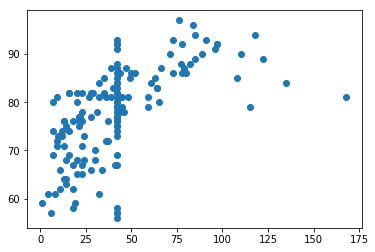

In [89]:
plt.scatter(X,Y)

In [21]:
import seaborn as sns


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
